# Danial Razavi
# Weekly Project

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from os import listdir

In [3]:
files=listdir()
print(files)

['.ipynb_checkpoints', 'Project Data.ipynb', 'weekly.csv']


# Business understanding 
## (first step CRISP-DM)

In [4]:
df=pd.read_csv('weekly.csv')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [5]:
df.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

'Year': The year that the observation was recorded <br>
'Lag1': Percentage return for previous week <br>
'Lag2': Percentage return for 2 weeks previous <br>
'Lag3': Percentage return for 3 weeks previous <br>
'Lag4': Percentage return for 4 weeks previous <br>
'Lag5': Percentage return for 5 weeks previous <br>
'Volume': Volume of shares traded (average number of daily shares traded in billions) <br>
'Today': Percentage return for this week <br>
'Direction': A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week <br>

# Data Underatanding Data Prepration 
## (second step CRISP-DM)

#### Investigating missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [7]:
df.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

### result: There are no missing values in our dataset.

## Visualiztion

### UP vs. DOWN (Direction)

<AxesSubplot:xlabel='Direction', ylabel='count'>

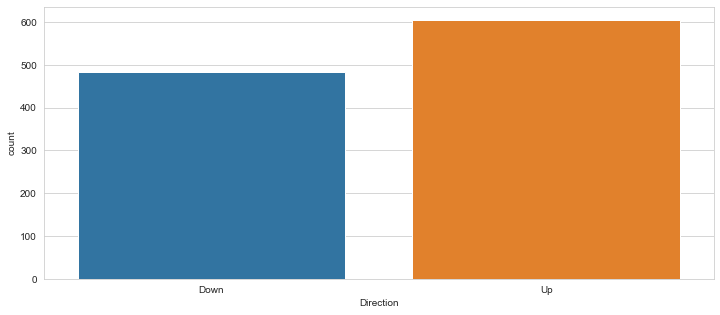

In [8]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='Direction',data=df)

### Lag 1 to 5

<AxesSubplot:>

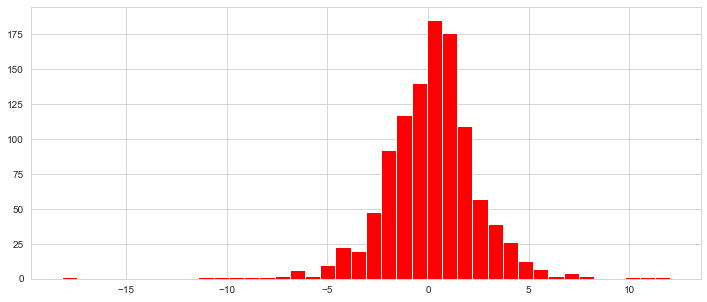

In [9]:
plt.figure(figsize=(12,5))
df['Lag1'].hist(color='red',bins=40)

### Volume

<AxesSubplot:>

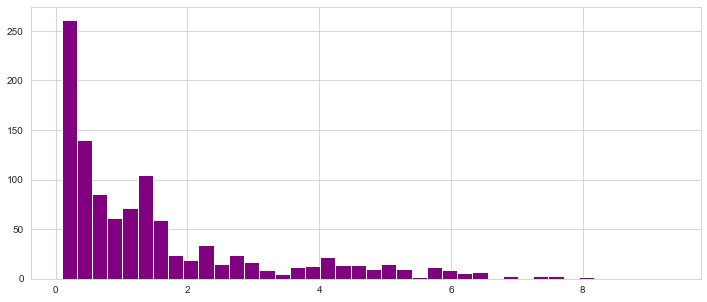

In [10]:
plt.figure(figsize=(12,5))
df['Volume'].hist(color='Purple',bins=40)

<AxesSubplot:xlabel='Direction', ylabel='Volume'>

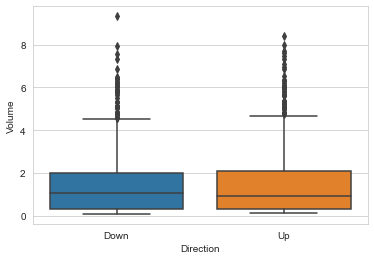

In [11]:
sns.boxplot(x='Direction',y='Volume',data=df)

#### Why is the above boxplot  like this? 

Over the years, more people have entered the stock market due to <br>
the maturing of the stock market and the growth of the population, <br>
and as a result, the volume of transactions increases as the years  <br>
go by. <br>

### Direction beside Year

In [12]:
df_grouped=pd.crosstab(df['Direction'],df['Year'])
df_grouped

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Direction,,,,,,,,,,,,,,,,,,,,,
Down,23,21,23,21,25,16,21,24,19,22,...,27,30,18,24,22,23,24,29,23,20
Up,24,31,29,31,27,36,32,28,33,30,...,25,22,34,28,30,29,29,23,29,32


<AxesSubplot:xlabel='Year', ylabel='count'>

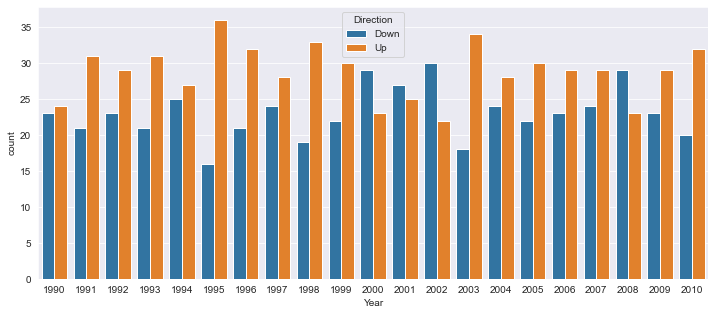

In [13]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.countplot(x='Year',data=df,hue='Direction')

###  Converting Categorical Features

In [14]:
direction=pd.get_dummies(df['Direction'],drop_first=True)
direction

,Up
0,0
1,0
2,1
3,1
4,1
...,...
1084,1
1085,1
1086,1
1087,1


In [15]:
df=pd.concat([df,direction],axis=1)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


# Train Test Split

In [16]:
df.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
Up           0
dtype: int64

In [17]:
df.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction', 'Up'],
      dtype='object')

In [18]:
X=df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.861,0.043,-2.173,3.599,0.015,3.205160
1085,2.969,-0.861,0.043,-2.173,3.599,4.242568
1086,1.281,2.969,-0.861,0.043,-2.173,4.835082
1087,0.283,1.281,2.969,-0.861,0.043,4.454044


In [19]:
y=df['Up']
y

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Up, Length: 1089, dtype: uint8

In [20]:
from sklearn.preprocessing import StandardScaler
scaled_data1=StandardScaler().fit_transform(X[['Lag1']])
scaled_data1

array([[ 0.28244262],
       [-0.17852183],
       [-1.15732846],
       ...,
       [ 0.4798169 ],
       [ 0.056205  ],
       [ 0.37497508]])

In [21]:
X=X.copy(deep = True)
X['Lag1']=scaled_data1
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.178522,0.816,1.572,-3.936,-0.229,0.148574
2,-1.157328,-0.270,0.816,1.572,-3.936,0.159837
3,1.427638,-2.576,-0.270,0.816,1.572,0.161630
4,0.238299,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.429378,0.043,-2.173,3.599,0.015,3.205160
1085,1.196307,-0.861,0.043,-2.173,3.599,4.242568
1086,0.479817,2.969,-0.861,0.043,-2.173,4.835082
1087,0.056205,1.281,2.969,-0.861,0.043,4.454044


In [22]:
from sklearn.preprocessing import StandardScaler
scaled_data2=StandardScaler().fit_transform(X[['Lag2']])
scaled_data2

array([[ 0.60306345],
       [ 0.28220398],
       [-0.1787132 ],
       ...,
       [ 1.19597441],
       [ 0.47955802],
       [ 0.05598957]])

In [23]:
X=X.copy(deep = True)
X['Lag2']=scaled_data2
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,0.603063,-3.936,-0.229,-3.484,0.154976
1,-0.178522,0.282204,1.572,-3.936,-0.229,0.148574
2,-1.157328,-0.178713,0.816,1.572,-3.936,0.159837
3,1.427638,-1.157419,-0.270,0.816,1.572,0.161630
4,0.238299,1.427282,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.429378,-0.045871,-2.173,3.599,0.015,3.205160
1085,1.196307,-0.429544,0.043,-2.173,3.599,4.242568
1086,0.479817,1.195974,-0.861,0.043,-2.173,4.835082
1087,0.056205,0.479558,2.969,-0.861,0.043,4.454044


In [24]:
from sklearn.preprocessing import StandardScaler
scaled_data3=StandardScaler().fit_transform(X[['Lag3']])
scaled_data3

array([[-1.73059834],
       [ 0.60387573],
       [ 0.28345772],
       ...,
       [-0.4273108 ],
       [ 1.19597091],
       [ 0.48054022]])

In [25]:
X=X.copy(deep = True)
X['Lag3']=scaled_data3
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,0.603063,-1.730598,-0.229,-3.484,0.154976
1,-0.178522,0.282204,0.603876,-3.936,-0.229,0.148574
2,-1.157328,-0.178713,0.283458,1.572,-3.936,0.159837
3,1.427638,-1.157419,-0.176825,0.816,1.572,0.161630
4,0.238299,1.427282,-1.154185,-0.270,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.429378,-0.045871,-0.983380,3.599,0.015,3.205160
1085,1.196307,-0.429544,-0.044165,-2.173,3.599,4.242568
1086,0.479817,1.195974,-0.427311,0.043,-2.173,4.835082
1087,0.056205,0.479558,1.195971,-0.861,0.043,4.454044


In [26]:
from sklearn.preprocessing import StandardScaler
scaled_data4=StandardScaler().fit_transform(X[['Lag4']])
scaled_data4

array([[-0.15887546],
       [-1.73017421],
       [ 0.60452056],
       ...,
       [-0.04358189],
       [-0.42676346],
       [ 1.19667171]])

In [27]:
X=X.copy(deep = True)
X['Lag4']=scaled_data4
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,0.603063,-1.730598,-0.158875,-3.484,0.154976
1,-0.178522,0.282204,0.603876,-1.730174,-0.229,0.148574
2,-1.157328,-0.178713,0.283458,0.604521,-3.936,0.159837
3,1.427638,-1.157419,-0.176825,0.284072,1.572,0.161630
4,0.238299,1.427282,-1.154185,-0.176254,0.816,0.153728
...,...,...,...,...,...,...
1084,-0.429378,-0.045871,-0.983380,1.463712,0.015,3.205160
1085,1.196307,-0.429544,-0.044165,-0.982885,3.599,4.242568
1086,0.479817,1.195974,-0.427311,-0.043582,-2.173,4.835082
1087,0.056205,0.479558,1.195971,-0.426763,0.043,4.454044


In [28]:
from sklearn.preprocessing import StandardScaler
scaled_data5=StandardScaler().fit_transform(X[['Lag5']])
scaled_data5

array([[-1.5354174 ],
       [-0.15629714],
       [-1.72692657],
       ...,
       [-0.97995606],
       [-0.04105269],
       [-0.42407103]])

In [29]:
X=X.copy(deep = True)
X['Lag5']=scaled_data5
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,0.603063,-1.730598,-0.158875,-1.535417,0.154976
1,-0.178522,0.282204,0.603876,-1.730174,-0.156297,0.148574
2,-1.157328,-0.178713,0.283458,0.604521,-1.726927,0.159837
3,1.427638,-1.157419,-0.176825,0.284072,0.606774,0.161630
4,0.238299,1.427282,-1.154185,-0.176254,0.286462,0.153728
...,...,...,...,...,...,...
1084,-0.429378,-0.045871,-0.983380,1.463712,-0.052916,3.205160
1085,1.196307,-0.429544,-0.044165,-0.982885,1.465599,4.242568
1086,0.479817,1.195974,-0.427311,-0.043582,-0.979956,4.835082
1087,0.056205,0.479558,1.195971,-0.426763,-0.041053,4.454044


In [30]:
from sklearn.preprocessing import StandardScaler
scaled_data6=StandardScaler().fit_transform(X[['Volume']])
scaled_data6

array([[-0.84208658],
       [-0.84588404],
       [-0.83920289],
       ...,
       [ 1.9340045 ],
       [ 1.70798479],
       [ 0.67175574]])

In [31]:
X=X.copy(deep = True)
X['Volume']=scaled_data6
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,0.603063,-1.730598,-0.158875,-1.535417,-0.842087
1,-0.178522,0.282204,0.603876,-1.730174,-0.156297,-0.845884
2,-1.157328,-0.178713,0.283458,0.604521,-1.726927,-0.839203
3,1.427638,-1.157419,-0.176825,0.284072,0.606774,-0.838140
4,0.238299,1.427282,-1.154185,-0.176254,0.286462,-0.842827
...,...,...,...,...,...,...
1084,-0.429378,-0.045871,-0.983380,1.463712,-0.052916,0.967186
1085,1.196307,-0.429544,-0.044165,-0.982885,1.465599,1.582544
1086,0.479817,1.195974,-0.427311,-0.043582,-0.979956,1.934004
1087,0.056205,0.479558,1.195971,-0.426763,-0.041053,1.707985


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3 ,random_state=101)

In [34]:
X_train.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
1078,0.338471,0.636168,-0.152243,0.807132,0.553388,1.705088
555,-0.421738,-0.558991,-0.876150,-0.793838,0.343660,-0.261716
205,0.388558,0.249948,-0.146733,0.028900,0.164438,-0.753861
700,-0.268932,0.471494,0.349152,-0.890481,0.244093,-0.025742
506,1.781638,-2.878856,1.695670,0.119185,-1.901488,-0.385345


In [35]:
X_test.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
1030,0.895788,1.291893,-1.766624,-0.376746,0.580928,1.568488
325,-0.832191,0.488046,0.494103,-1.299519,0.620756,-0.694491
420,0.557069,0.523273,0.257180,1.329768,0.944457,-0.581349
32,-0.802055,-0.926536,0.047806,1.441671,-2.168415,-0.845583
327,1.030767,0.627680,-0.829529,0.489651,0.497037,-0.682081


In [36]:
X_train.shape

(762, 6)

In [37]:
X_test.shape

(327, 6)

# Logestic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logr=LogisticRegression(max_iter=100,
    
                      C=5, 
                        random_state=101)

In [40]:
logr.fit(X_train,y_train)

LogisticRegression(C=5, random_state=101)

In [41]:
logr.predict_proba(X_test)

array([[0.35934342, 0.64065658],
       [0.42409979, 0.57590021],
       [0.46539704, 0.53460296],
       [0.43724878, 0.56275122],
       [0.43021517, 0.56978483],
       [0.46359257, 0.53640743],
       [0.43555307, 0.56444693],
       [0.4958614 , 0.5041386 ],
       [0.43328172, 0.56671828],
       [0.39654697, 0.60345303],
       [0.47103344, 0.52896656],
       [0.29673129, 0.70326871],
       [0.4465788 , 0.5534212 ],
       [0.40444871, 0.59555129],
       [0.52506652, 0.47493348],
       [0.3921451 , 0.6078549 ],
       [0.43618884, 0.56381116],
       [0.50171318, 0.49828682],
       [0.73104416, 0.26895584],
       [0.55873718, 0.44126282],
       [0.49342166, 0.50657834],
       [0.5855712 , 0.4144288 ],
       [0.46422289, 0.53577711],
       [0.48632786, 0.51367214],
       [0.42356913, 0.57643087],
       [0.3662894 , 0.6337106 ],
       [0.51021587, 0.48978413],
       [0.45766295, 0.54233705],
       [0.42426124, 0.57573876],
       [0.43161312, 0.56838688],
       [0.

In [42]:
pred_logr=logr.predict(X_test)
pred_logr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

#### evaluation

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,pred_logr)

array([[ 20, 129],
       [ 23, 155]], dtype=int64)

In [45]:
TN=20
TP=155
FN=23
FP=129

In [46]:
Accuracy=(TN+TP)/(TN+TP+FN+FP)
Accuracy

0.5351681957186545

In [47]:
Precision=TP/(TP+FP)
Precision

0.545774647887324

In [48]:
sensitivity=TP/(TP+FN)
sensitivity

0.8707865168539326

In [49]:
specificity=TN/(TN+FP)
specificity

0.1342281879194631

In [50]:
# K fold cross validation
import itertools
max_iter=[200,300,400,500]
C=[1,2,3,4]
grid=itertools.product( max_iter,C)
grid=pd.DataFrame(grid,index=range(1,17),columns=[['max_iter','C']])
grid

,max_iter,C
1,200,1
2,200,2
3,200,3
4,200,4
5,300,1
6,300,2
7,300,3
8,300,4
9,400,1
10,400,2


In [51]:
# k fold cross validtion
from sklearn.model_selection import cross_val_score
SC=[]
for i in range(0,16):
    lor=LogisticRegression(max_iter=grid.iloc[i,0],

                      C=grid.iloc[i,1],
       random_state=101)
    Scores=cross_val_score(lor,X=X_train,y=y_train,
                           cv=10,scoring='accuracy')
    SC.append(np.mean(Scores))

In [52]:
SC

[0.5524777853725222,
 0.551161995898838,
 0.551161995898838,
 0.551161995898838,
 0.5524777853725222,
 0.551161995898838,
 0.551161995898838,
 0.551161995898838,
 0.5524777853725222,
 0.551161995898838,
 0.551161995898838,
 0.551161995898838,
 0.5524777853725222,
 0.551161995898838,
 0.551161995898838,
 0.551161995898838]

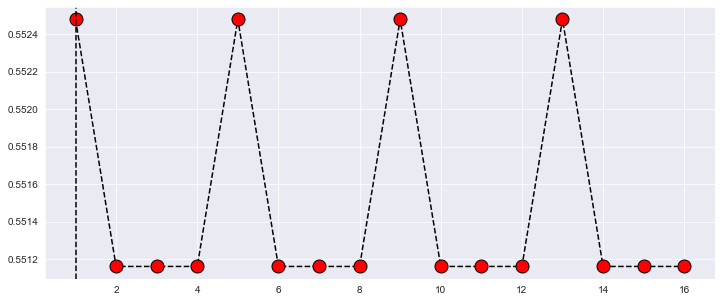

In [53]:
plt.figure(figsize=(12,5))
plt.plot(range(1,17),SC, marker='o',markerfacecolor='red',color='black',
         markeredgecolor='black',markeredgewidth=1,markersize=13,linestyle='--')
plt.axvline(np.argmax(SC)+1,linestyle='--',color='black')

### The best model of logestic Regression


In [54]:
 logr=LogisticRegression(max_iter=grid.iloc[0,0],C=grid.iloc[0,1], random_state=101)

In [55]:
logr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=200, random_state=101)

In [56]:
pred_logr=logr.predict(X_test)
pred_logr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [57]:
from sklearn.metrics import confusion_matrix
C_M=confusion_matrix(y_test,pred_logr)
C_M

array([[ 19, 130],
       [ 22, 156]], dtype=int64)

In [58]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [59]:
model_evaluate=pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Logestic Regression"])
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517


## Decision Tree


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
Class_tree=DecisionTreeClassifier(max_depth=5,
                               min_samples_leaf=5,
                               ccp_alpha=0.01)

In [62]:
fit_tree=Class_tree.fit(X_train,y_train)

In [63]:
X.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')

In [64]:
import itertools
max_depth=[4,6,8]
min_samples_leaf=[5,10,15]
ccp_alpha=[0.0001,0.001,0.01]
grid=list(itertools.product(max_depth,min_samples_leaf,ccp_alpha))
grid=pd.DataFrame(grid,index=range(1,28),columns=['max_depth','min_samples_leaf','ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,4,5,0.0001
2,4,5,0.0010
3,4,5,0.0100
4,4,10,0.0001
5,4,10,0.0010
6,4,10,0.0100
7,4,15,0.0001
8,4,15,0.0010
9,4,15,0.0100
10,6,5,0.0001


In [65]:
# k fold cross validtion
SC=[]
for i in range(1,28):
    reg_tree=DecisionTreeClassifier(max_depth=grid.loc[i,'max_depth'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               ccp_alpha=grid.loc[i,'ccp_alpha'],random_state=101)
    Scores=cross_val_score(reg_tree,X=X_train,y=y_train,
                           cv=10,scoring='accuracy')
    SC.append(np.mean(Scores))

In [66]:
SC

[0.5275119617224882,
 0.5275119617224882,
 0.5603725222146274,
 0.5196172248803828,
 0.5196172248803828,
 0.5603725222146274,
 0.526179084073821,
 0.526179084073821,
 0.5603725222146274,
 0.5512645249487355,
 0.5512645249487355,
 0.5603725222146274,
 0.5708988380041011,
 0.5708988380041011,
 0.5603725222146274,
 0.5695488721804511,
 0.5695488721804511,
 0.5603725222146274,
 0.5314593301435406,
 0.5340909090909091,
 0.5603725222146274,
 0.556390977443609,
 0.556390977443609,
 0.5603725222146274,
 0.56026999316473,
 0.56026999316473,
 0.5603725222146274]

Text(0, 0.5, 'accuracy')

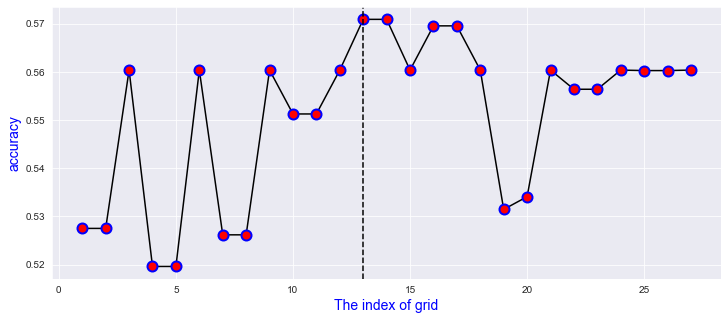

In [67]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),SC,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmax(SC)+1,linestyle='--',color='black')
plt.xlabel('The index of grid',fontsize=14,color='blue')
plt.ylabel('accuracy',fontsize=14,color='blue')

## Apply the best model

In [68]:
class_tree=DecisionTreeClassifier(max_depth=grid.loc[13,'max_depth'],
                               min_samples_leaf=grid.loc[13,'min_samples_leaf'],
                               ccp_alpha=grid.loc[13,'ccp_alpha'],random_state=101)
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=6, min_samples_leaf=10,
                       random_state=101)

In [69]:
pred_tree=class_tree.predict(X_test)
pred_tree

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [70]:
from sklearn.metrics import confusion_matrix
C_M=confusion_matrix(y_test,pred_tree)
C_M

array([[ 39, 110],
       [ 62, 116]], dtype=int64)

In [71]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [72]:
model_evaluate=model_evaluate.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Decision Tree"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517
Decision Tree,0.474006,0.513274,0.651685,0.261745


## Bagging

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
bagging_class=RandomForestClassifier(n_estimators=500,max_features=8,random_state=123)

In [75]:
import itertools
n_estimators=[50,100,150]
min_samples_leaf=[3,5,7]
grid=list(itertools.product(n_estimators,min_samples_leaf))
grid=pd.DataFrame(grid,index=range(1,10),columns=['n_estimators','min_samples_leaf'])
grid

,n_estimators,min_samples_leaf
1,50,3
2,50,5
3,50,7
4,100,3
5,100,5
6,100,7
7,150,3
8,150,5
9,150,7


In [76]:
# k fold cross validtion
from sklearn.model_selection import cross_val_score
SC=[]
for i in range(1,10):
    rfr=RandomForestClassifier(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf']
                            ,random_state=101
                             )
    Scores=cross_val_score(rfr,X=X_train,y=y_train.values.ravel(),
                           cv=5,scoring='accuracy')
    SC.append(np.mean(Scores));

In [77]:
SC

[0.5380546955624356,
 0.531484348125215,
 0.5446766425868593,
 0.5406518747850017,
 0.5262125902992776,
 0.534124527003784,
 0.5328087375300998,
 0.5249140006879944,
 0.5341331269349845]

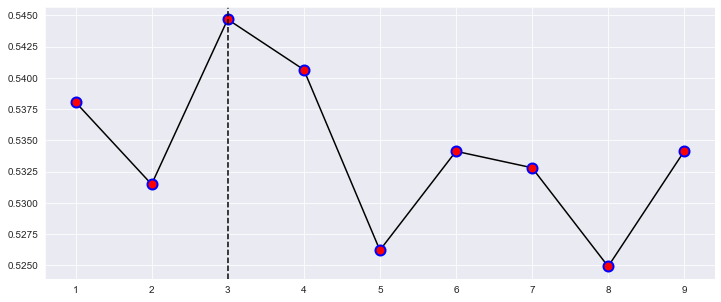

In [78]:
plt.figure(figsize=(12,5))
plt.plot(range(1,10),SC,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmax(SC)+1,linestyle='--',color='black')

### The best model of Bagging

In [79]:
Bag=RandomForestClassifier(n_estimators=grid.loc[3,'n_estimators'],
                               min_samples_leaf=grid.loc[3,'min_samples_leaf']
                           ,random_state=101)

In [80]:
Bag.fit(X_train,y_train.values.ravel())

RandomForestClassifier(min_samples_leaf=7, n_estimators=50, random_state=101)

## Prediction on test data

In [81]:
pred_Bag=Bag.predict(X_test)
pred_Bag

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,

In [82]:
from sklearn.metrics import confusion_matrix
C_M=confusion_matrix(y_test,pred_Bag)
C_M

array([[ 55,  94],
       [ 60, 118]], dtype=int64)

In [83]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [84]:
model_evaluate=model_evaluate.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Bagging"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517
Decision Tree,0.474006,0.513274,0.651685,0.261745
Bagging,0.529052,0.556604,0.662921,0.369128


# RandomForest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
RFC=RandomForestClassifier(n_estimators=100,max_depth=4,max_features=4,min_samples_leaf=1,random_state=101)

In [87]:
n_estimators=[50,100,150]
min_samples_leaf=[3,5,7]
max_features=[2,3,4]
grid=list(itertools.product(n_estimators,min_samples_leaf,max_features))
grid=pd.DataFrame(grid,index=range(1,28),columns=['n_estimators','min_samples_leaf','max_features'])
grid

,n_estimators,min_samples_leaf,max_features
1,50,3,2
2,50,3,3
3,50,3,4
4,50,5,2
5,50,5,3
6,50,5,4
7,50,7,2
8,50,7,3
9,50,7,4
10,100,3,2


In [88]:
# k fold cross validtion
from sklearn.model_selection import cross_val_score
SC=[]
for i in range(1,28):
    RFC=RandomForestClassifier(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               max_features=grid.loc[i,'max_features'],random_state=101
                             )
    Scores=cross_val_score(RFC,X=X_train,y=y_train.values.ravel(),
                           cv=5,scoring='accuracy')
    SC.append(np.mean(Scores));

In [89]:
SC

[0.5380546955624356,
 0.5302201582387341,
 0.5223168214654283,
 0.531484348125215,
 0.5406346749226006,
 0.5511351909184727,
 0.5446766425868593,
 0.530202958376333,
 0.534124527003784,
 0.5406518747850017,
 0.5262813897488821,
 0.5026401788785689,
 0.5262125902992776,
 0.5380116959064327,
 0.5340901272789818,
 0.534124527003784,
 0.5157378740970071,
 0.5275369797041624,
 0.5328087375300998,
 0.5289129686962506,
 0.5144306845545236,
 0.5249140006879944,
 0.5393790849673202,
 0.5288699690402476,
 0.5341331269349845,
 0.5288871689026488,
 0.5340901272789818]

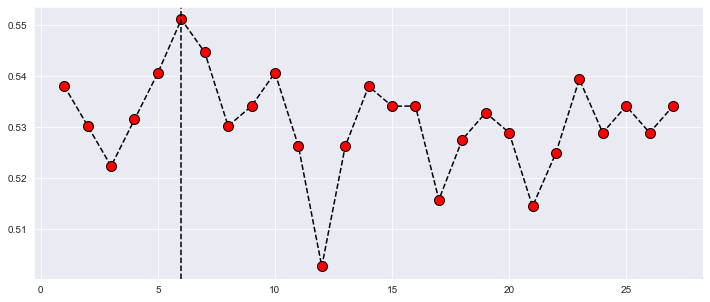

In [90]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),SC,marker='o',markersize=10,
         markerfacecolor='red',linestyle='--',color='black',
        markeredgecolor='black')
plt.axvline(np.argmax(SC)+1,color='black',linestyle='--')

### The best model of RandomForest


In [91]:
RFC=RandomForestClassifier(n_estimators=grid.loc[6,'n_estimators'],
                               min_samples_leaf=grid.loc[6,'min_samples_leaf'],
                               max_features=grid.loc[6,'max_features'],random_state=101)

In [92]:
RFC.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_features=4, min_samples_leaf=5, n_estimators=50,
                       random_state=101)

### The importance of variable

In [93]:
RFC.feature_importances_
importance=pd.DataFrame(RFC.feature_importances_,index=[X_train.columns],columns=["importance"])
importance

,importance
Lag1,0.188159
Lag2,0.201644
Lag3,0.133465
Lag4,0.155651
Lag5,0.189330
Volume,0.131750


<Figure size 1080x720 with 0 Axes>

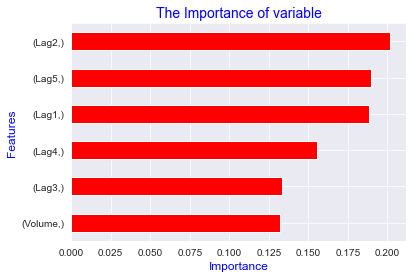

In [94]:
plt.figure(figsize=(15,10))
importance.sort_values(by='importance',ascending=True).plot(kind='barh',color='red',legend=None)
plt.xlabel('Importance',color='blue',fontsize=12)
plt.ylabel('Features',color='blue',fontsize=12)
plt.title('The Importance of variable',color='blue',fontsize=14);

## Prediction on test data

In [95]:
pred_rfc=RFC.predict(X_test)
pred_rfc

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [96]:
from sklearn.metrics import confusion_matrix
C_M=confusion_matrix(y_test,pred_rfc)
C_M

array([[ 48, 101],
       [ 64, 114]], dtype=int64)

In [97]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [98]:
model_evaluate=model_evaluate.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Random Forest"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517
Decision Tree,0.474006,0.513274,0.651685,0.261745
Bagging,0.529052,0.556604,0.662921,0.369128
Random Forest,0.495413,0.530233,0.640449,0.322148


# Linear Discriminant analysis


In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [100]:
lda=LinearDiscriminantAnalysis()

In [101]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [102]:
lda.predict_proba(X_test)

array([[0.36497501, 0.63502499],
       [0.42374   , 0.57626   ],
       [0.46268528, 0.53731472],
       [0.43854629, 0.56145371],
       [0.43064585, 0.56935415],
       [0.45829383, 0.54170617],
       [0.43496468, 0.56503532],
       [0.49335588, 0.50664412],
       [0.43668146, 0.56331854],
       [0.39815987, 0.60184013],
       [0.4687066 , 0.5312934 ],
       [0.30310126, 0.69689874],
       [0.44627397, 0.55372603],
       [0.4060248 , 0.5939752 ],
       [0.52003886, 0.47996114],
       [0.39656369, 0.60343631],
       [0.434792  , 0.565208  ],
       [0.49952968, 0.50047032],
       [0.72048984, 0.27951016],
       [0.55383894, 0.44616106],
       [0.48894768, 0.51105232],
       [0.57767877, 0.42232123],
       [0.46231754, 0.53768246],
       [0.48876088, 0.51123912],
       [0.42409682, 0.57590318],
       [0.36879563, 0.63120437],
       [0.50790811, 0.49209189],
       [0.45734782, 0.54265218],
       [0.42409236, 0.57590764],
       [0.43195141, 0.56804859],
       [0.

In [103]:
pred_lda=lda.predict(X_test)
pred_lda

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [104]:
C_M=confusion_matrix(y_test,pred_lda)
C_M

array([[ 18, 131],
       [ 21, 157]], dtype=int64)

In [105]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [106]:
model_evaluate=model_evaluate.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["LDA"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517
Decision Tree,0.474006,0.513274,0.651685,0.261745
Bagging,0.529052,0.556604,0.662921,0.369128
Random Forest,0.495413,0.530233,0.640449,0.322148
LDA,0.535168,0.545139,0.882022,0.120805


# Support vector machine

In [107]:
from sklearn.svm import SVC

In [108]:
svc=SVC(C=1.0,
        kernel='poly', 
        degree=3,
random_state=101)

In [109]:
# K_fold cross validation
C=[1,2,3]
degree=[2,3,4]  
grid=itertools.product(C,degree)
grid=pd.DataFrame(grid,index=range(1,10),columns=['C','degree'])
grid

,C,degree
1,1,2
2,1,3
3,1,4
4,2,2
5,2,3
6,2,4
7,3,2
8,3,3
9,3,4


In [110]:
from sklearn.model_selection import cross_val_score
scsvc=[]
for i in range(0,9):
    svc=SVC(C=grid.iloc[i,0],
           degree=grid.iloc[i,1],random_state=101)
    scores=cross_val_score(estimator=svc,X=X_train,
                          y=y_train,
                          cv=10,scoring='accuracy')
    scsvc.append(np.mean(scores))
scsvc    

[0.5365345181134654,
 0.5365345181134654,
 0.5365345181134654,
 0.5365516062884483,
 0.5365516062884483,
 0.5365516062884483,
 0.540498974709501,
 0.540498974709501,
 0.540498974709501]

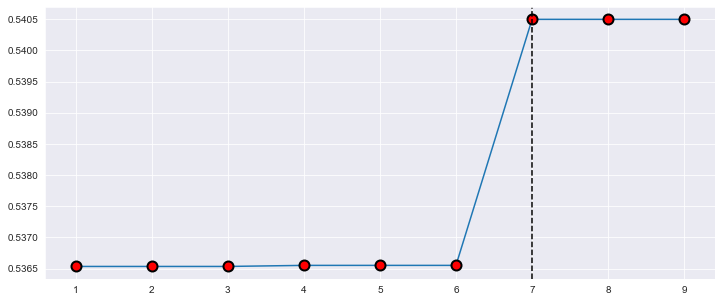

In [111]:
plt.figure(figsize=(12,5))
plt.plot(range(1,10),scsvc,
        marker='o',markersize=10,markerfacecolor='red',markeredgecolor='black',
        markeredgewidth=2)
plt.axvline(np.argmax(scsvc)+1,color='black',linestyle='--')

In [112]:
svc=SVC(C=grid.iloc[6,0],
           degree=grid.iloc[6,1],random_state=101)

In [113]:
svc.fit(X_train,y_train)

SVC(C=3, degree=2, random_state=101)

In [114]:
pred_svc=svc.predict(X_test)
pred_svc

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [115]:
C_M=confusion_matrix(y_test,pred_svc)
C_M

array([[ 48, 101],
       [ 54, 124]], dtype=int64)

In [116]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [117]:
model_evaluate=model_evaluate.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["SVM"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517
Decision Tree,0.474006,0.513274,0.651685,0.261745
Bagging,0.529052,0.556604,0.662921,0.369128
Random Forest,0.495413,0.530233,0.640449,0.322148
LDA,0.535168,0.545139,0.882022,0.120805
SVM,0.525994,0.551111,0.696629,0.322148


# K-nearset neighbors

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn=KNeighborsClassifier(n_neighbors=5)

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [121]:
pred_knn=knn.predict(X_test)

In [122]:
C_M=confusion_matrix(y_test,pred_knn)
C_M

array([[ 54,  95],
       [ 66, 112]], dtype=int64)

In [123]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [124]:
model_evaluate=model_evaluate.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["KNN"]))
model_evaluate

,Accuracy,Precision,Sensitivity,Specificity
Logestic Regression,0.535168,0.545455,0.876404,0.127517
Decision Tree,0.474006,0.513274,0.651685,0.261745
Bagging,0.529052,0.556604,0.662921,0.369128
Random Forest,0.495413,0.530233,0.640449,0.322148
LDA,0.535168,0.545139,0.882022,0.120805
SVM,0.525994,0.551111,0.696629,0.322148
KNN,0.507645,0.541063,0.629213,0.362416


### The Results: The best model is Logestic Regression.

# The Best model

In [125]:
logr=LogisticRegression(max_iter=200,
    
                      C=1, 
                        random_state=101)

In [126]:
logr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=200, random_state=101)

In [127]:
logr.predict_proba(X_test)

array([[0.35974965, 0.64025035],
       [0.42422088, 0.57577912],
       [0.46525558, 0.53474442],
       [0.43717381, 0.56282619],
       [0.43026934, 0.56973066],
       [0.46349911, 0.53650089],
       [0.43559714, 0.56440286],
       [0.49560114, 0.50439886],
       [0.43332773, 0.56667227],
       [0.39677357, 0.60322643],
       [0.47084995, 0.52915005],
       [0.29732471, 0.70267529],
       [0.4465509 , 0.5534491 ],
       [0.40461652, 0.59538348],
       [0.52465767, 0.47534233],
       [0.39239961, 0.60760039],
       [0.43622818, 0.56377182],
       [0.50144163, 0.49855837],
       [0.72993892, 0.27006108],
       [0.55818524, 0.44181476],
       [0.49319237, 0.50680763],
       [0.58487913, 0.41512087],
       [0.46413878, 0.53586122],
       [0.4859687 , 0.5140313 ],
       [0.42363665, 0.57636335],
       [0.36665184, 0.63334816],
       [0.50985847, 0.49014153],
       [0.45755047, 0.54244953],
       [0.4243525 , 0.5756475 ],
       [0.43165569, 0.56834431],
       [0.

In [128]:
pred_logr=logr.predict(X_test)

In [129]:
C_M=confusion_matrix(y_test,pred_logr)
C_M

array([[ 19, 130],
       [ 22, 156]], dtype=int64)

In [130]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]

In [131]:
Accuracy=(TN+TP)/(TP+TN+FN+FP)
Accuracy 

0.5351681957186545

In [132]:
Precision=TP/(TP+FP)
Precision

0.5454545454545454

In [133]:
Sensitivity=TP/(TP+FN)
Sensitivity

0.8764044943820225

In [134]:
Specificity=TN/(TN+FP)
Specificity

0.12751677852348994

# End of code